# This part is Data Exploration. I did the work like data analysis, EDA work in this part, to have a first view on our dataset


In [1]:
#import data, including train and test data

import pandas as pd
import numpy as np
train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')

#check the shape of train and test data
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


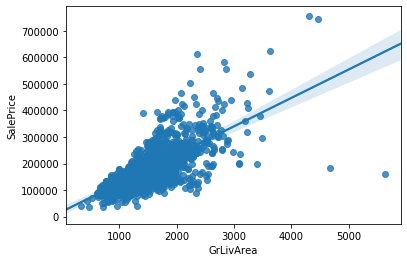

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(train['GrLivArea'], train['SalePrice'])
plt.show()

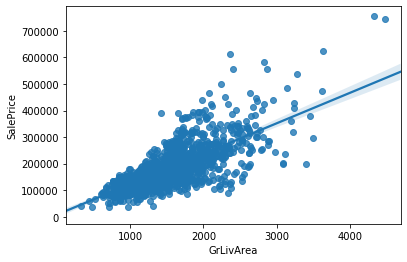

In [3]:
train=train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)
sns.regplot(train['GrLivArea'], train['SalePrice'])
plt.show()


 mu = 180932.92 and sigma = 79467.79



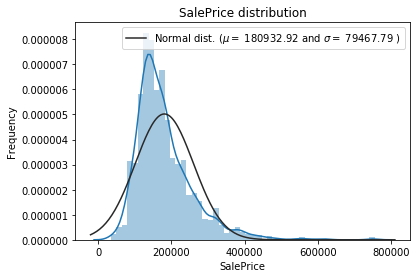

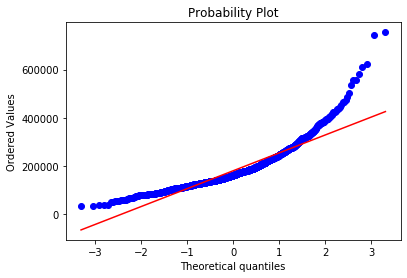

In [4]:
from scipy.stats import norm
from scipy import stats
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

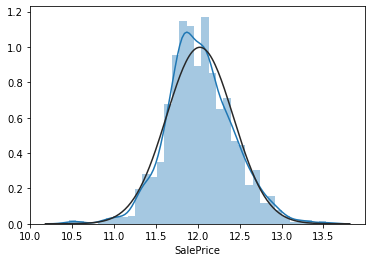

In [5]:
#due to distribution of target value -- Saleprice is not normal, use log(1+x)
train["SalePrice"] = np.log1p(train["SalePrice"])
sns.distplot(train['SalePrice'], fit=norm)
plt.show()

In [6]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2917, 80)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [7]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageQual,5.450806
GarageCond,5.450806
GarageFinish,5.450806
GarageYrBlt,5.450806


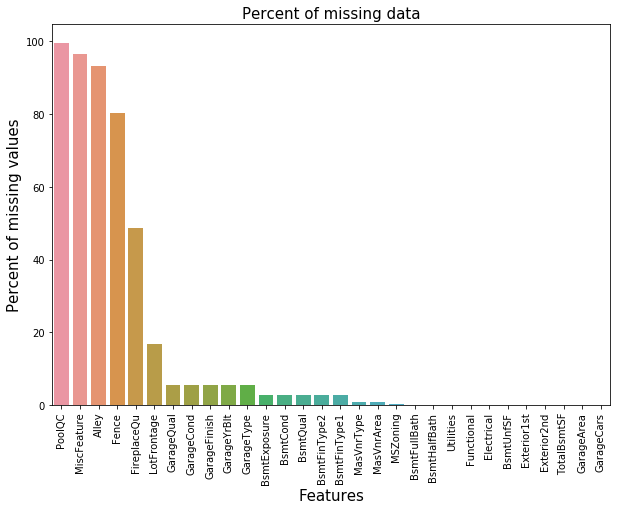

In [8]:
f, ax = plt.subplots(figsize=(10, 7))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent of missing data', fontsize=15)
plt.show()